利用numpy进行数据处理

In [4]:
# 数据处理的过程可以用数组表达式的过程表述，其中用数组表达式代替循环的做法通常被称为矢量化。
# 我记得涛涛之前说过矢量化会提高运算速度，不过是结合线性代数，但本质也是矩阵的计算，且往后继续看看~

In [5]:
import numpy as np

In [2]:
# 就像在numpy的索引和切片中提到的那样，广播是争对矢量化计算的强大手段。

In [6]:
points = np.arange(-5,5,0.01)

In [7]:
xs,ys = np.meshgrid(points,points)    # meshgrid函数接受两个一维数组，并产生两个二维矩阵。想象二维空间的坐标系~

In [8]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [9]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [10]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [11]:
# 以上，就完成了我们所说的二维空间求两点间的距离。

In [12]:
import matplotlib.pyplot as plt

In [13]:
# 可以考虑实现可视化  ，这里先跳过，之后会涉及

将条件逻辑表述为数组运算

In [14]:
# numpy.where : 三元表达式 x if condition else y 的矢量化版本  //  目的：主要是为了适应于大数组的处理速度；适应多维数组

In [15]:
# 在数据分析中，where通常用于根据另一个数组而产生一个新的数组。

# 例子如下： 

# 有一个随机数据矩阵，将所有正值替换为2，所有负值替换为-2

In [16]:
arr = np.random.randn(4,4)
arr

array([[ 0.52635227,  0.40356299, -0.246191  ,  0.50289737],
       [-0.69235021,  1.30338582, -1.15863794,  0.69234582],
       [ 2.52323325,  0.59171368, -1.08269895,  0.18208746],
       [ 1.80719892, -0.51366124, -1.45052261,  2.64063512]])

In [17]:
arr > 0

array([[ True,  True, False,  True],
       [False,  True, False,  True],
       [ True,  True, False,  True],
       [ True, False, False,  True]])

In [18]:
np.where(arr>0,2,-2)

array([[ 2,  2, -2,  2],
       [-2,  2, -2,  2],
       [ 2,  2, -2,  2],
       [ 2, -2, -2,  2]])

In [19]:
# 上面这个例子用了where果然好简洁>-<

一些数学和统计方法

In [21]:
# numpy可以对整个数组或某个轴向的数据进行统计计算，sum、mean以及标准差std等聚合计算，
# 其实既可以当作数组的实例方法调用，也可以当作顶级Numpy函数使用。

In [22]:
# 如下例的聚类统计：

In [23]:
arr = np.random.randn(5,4)
arr

array([[-0.34366314,  0.09978132,  1.55084618,  0.08928583],
       [ 0.67567874, -0.78583877,  1.21251144, -1.36262789],
       [ 1.56597975,  0.88860566, -1.30606968,  0.47220032],
       [ 1.03396557, -2.3816661 , -1.83662005, -1.05078444],
       [ 0.58332074,  1.18365386,  0.43878257, -0.94401639]])

In [24]:
arr.mean()
# 或者可以写成是：np.mean(arr)     
# mean函数是计算行的平均值的意思

-0.010833725650257342

In [27]:
arr.sum()

-0.21667451300514684

对于布尔型数组的办法

In [28]:
arr = np.random.randn(100)

In [30]:
(arr > 0).sum()

47

In [ ]:
# 两种方法：
# any 用于测试数组中是否存在一个或多个True
# all用于检查数组中所有值是否都是True

In [31]:
bools = np.array([False,False,True,False])

In [32]:
bools.any()

True

In [33]:
bools.all()

False

排序

In [34]:
# 此处与Python内置的列表类型一样，Numpy数组也可以通过sort方法就地排序：

In [39]:
arr = np.random.randn(6)

In [40]:
arr

array([-0.17603546, -0.68607911, -0.03090951,  0.54257559, -1.0048607 ,
       -0.0912589 ])

In [41]:

arr.sort()

In [42]:
arr

array([-1.0048607 , -0.68607911, -0.17603546, -0.0912589 , -0.03090951,
        0.54257559])

In [ ]:
# 多维数组可以在任何一个轴向上进行排序，只需将轴编号传给sort即可。

In [ ]:
# 这里有个点需要注意：np.sort返回的是数组的已排序的副本。

用于数组的文件输入输出

In [43]:
# numpy能够读写磁盘上的文本数据或二进制数据，这一小节只讨论Numpy的内置二进制格式，因为pandas在处理文本和表格数据的时候效果更好。

In [44]:
arr = np.arange(10)

In [45]:
np.save('some_array',arr)

In [46]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

线性代数

矩阵乘法、矩阵分解、行列式及其他

In [47]:
#Numpy提供了用于矩阵乘法的dot函数

In [48]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[6,23],[-1,7],[8,9]])

In [50]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [51]:
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [52]:
x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

In [53]:
# x.dot(y) = np.dot(x,y)

In [54]:
#   @ 表示中缀运算符，进行矩阵乘法

In [55]:
x @ np.ones(3)

array([ 6., 15.])

In [56]:
##  numpy.linalg有一组标准的矩阵分解运算以及诸如求逆和行列式等的东西。与R和MATLB使用的是相同的行业标准线性代数库。

In [57]:
## 伪随机数生产，当需要产生大量样本值时，numpy.random比python内置的random模块要强不止一个数量级

In [58]:
# 例子： 随机漫步

In [60]:
import random 

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

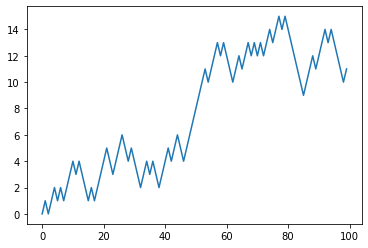

In [61]:
plt.plot(walk[:100])

In [62]:
# 关于随机漫步这个例子，感觉学问很大。应该属于一个复杂的统计任务，可以应用的范围也很广，比如抛硬币等等，延申下去就是概率论的知识了。

AttributeError: 'list' object has no attribute 'min'

若要一次模拟多个随机漫步

In [65]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks,nsteps))
steps = np.where(draws>0,1,-1)

In [66]:
walks = steps.cumsum(1)

In [67]:
walks

array([[  1,   2,   1, ...,  -8,  -9,  -8],
       [  1,   2,   1, ...,  14,  13,  14],
       [  1,   0,  -1, ..., -50, -51, -52],
       ...,
       [  1,   0,  -1, ...,  10,   9,  10],
       [ -1,   0,   1, ..., -40, -41, -42],
       [  1,   0,   1, ..., -34, -33, -32]], dtype=int32)

In [68]:
walks.max()

106

In [69]:
walks.min()

-123

In [71]:
hits30 = (np.abs(walks)>=30).any(1) #any(1)，对每一行按指定条件进行判断，条件为>=30，当每一行中只要存在1个>=30的数，即返回True，否则当所有值都小于30时，返回False
print(hits30)    #可以看出是一个布尔型列表
print(hits30.sum())  #True相当于1，即对1的数量求和
print(walks[hits30])     
print(np.abs(walks[hits30]))
crossing_times = (np.abs(walks[hits30])>=30).argmax(1)  #hits30列表中True对应在walks中的列表选出来，然后对其中的元素取绝对值。再对前面的语句用argmax(1)，即提取每行中首次出现绝对值>=30的元素索引值。
print(crossing_times)    #返回一个列表，列表中的每一个元素由每行中首次出现绝对值>=30的索引值构成
print(crossing_times.mean())

[False False  True ...  True  True  True]
3409
[[  1   0  -1 ... -50 -51 -52]
 [ -1  -2  -3 ...  44  43  44]
 [ -1  -2  -3 ...  76  77  76]
 ...
 [  1   0  -1 ...  10   9  10]
 [ -1   0   1 ... -40 -41 -42]
 [  1   0   1 ... -34 -33 -32]]
[[ 1  0  1 ... 50 51 52]
 [ 1  2  3 ... 44 43 44]
 [ 1  2  3 ... 76 77 76]
 ...
 [ 1  0  1 ... 10  9 10]
 [ 1  0  1 ... 40 41 42]
 [ 1  0  1 ... 34 33 32]]
[417 391 341 ... 253 289 347]
499.8823701965386


In [ ]:
#  numpy先到这里，之后会有对numpy特点的深入挖掘~

In [ ]:
# 双十一没控制住T-T，买买买忘记上传github,哭惹。。。。随机漫步明天找找别人的深入分析再发散一下，完了写个总结。